In [3]:
import matplotlib.pyplot as mplot
#import seaborn
import statistics as st
import random

In [4]:
%matplotlib inline

In [5]:
def coin_flip():
    '''Returns 0 for heads and 1 for tails'''
    return random.choice([0, 1])

In [6]:
def simulate(flip, n = 2**16):
    '''Simulates flipping a coin n number of times'''
    heads = 0
    tails = 0
    e = 0
    flip_results = []
    for step in range(1, n+1):
        if flip() == 0:
            heads += 1
        else:
            tails += 1
        if step == 2 ** e:
            flip_results.append((heads, tails))
            e += 1
    return flip_results

In [7]:
def ratio(m, n):
    try:
        return round(m/n, 2)
    except ZeroDivisionError:
        return 0

outcomes = simulate(lambda: coin_flip())
difference = [outs[0] - outs[1] for outs in outcomes]
ratios = [ratio(outs[0], outs[1]) for outs in outcomes]
x_label = [2**i for i in range(17)]

Line plot for differences between heads and tails at each recorded point.

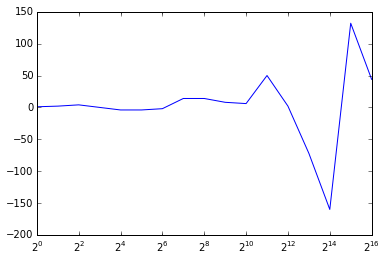

In [8]:
mplot.plot(x_label, difference)
mplot.xscale('log', basex=2)
mplot.show()

Line plot for the ratio of heads to tails at each recorded point.


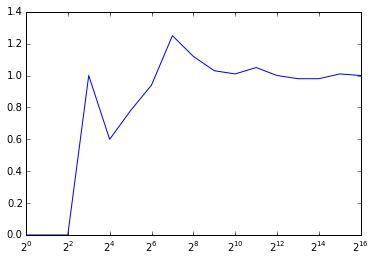

In [9]:
mplot.plot(x_label, ratios)
mplot.xscale('log', basex=2)
mplot.show()

Scatter plots [with a logarithmic scale for the x-axis.]

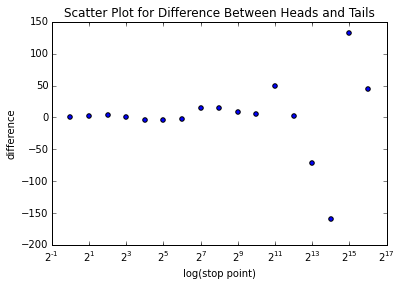

In [10]:
mplot.scatter(x_label, difference)
# mplot.xticks(range(5), x1)
mplot.xscale('log', basex=2)
mplot.xlabel("log(stop point)")
mplot.ylabel("difference")
mplot.title("Scatter Plot for Difference Between Heads and Tails")
mplot.show()

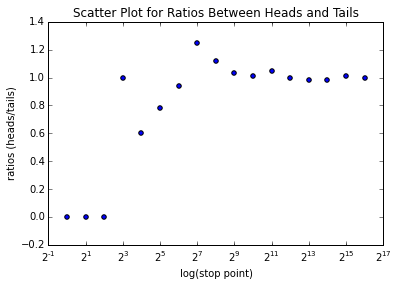

In [11]:
mplot.scatter(x_label, ratios)
mplot.xscale('log', basex=2)
mplot.xlabel("log(stop point)")
mplot.ylabel("ratios (heads/tails)")
mplot.title("Scatter Plot for Ratios Between Heads and Tails")
mplot.show()

##Observations

Write notes about what you observe. Feel free to add more plots to help you.

In [36]:
def simulate_bundled(flip, n = 2**16, trials = 20):
    '''Simulates flipping a coin n number of times'''
    heads = 0
    tails = []
    flip_results = []
    for trial in range(trials):
        flip_results.append(simulate(flip, n=n))
        #flip_results.append([(trial, tails)])
    return flip_results

def mean(values):
    return round(st.mean(values), 2)

def sd(values):
    return round(st.stdev(values), 2)

In [37]:
trial = simulate_bundled(lambda:coin_flip(), n = 2**16, trials=20)
heads = []
tails = []
means = []
sds = []
for tri in trial:
    for head, tail in tri:
        heads.append(head)
        tails.append(tail)
    means.append((mean(heads), mean(tails)))
    sds.append((sd(heads), sd(tails)))

# Plot for the ratio of means of heads to tails

In [38]:
mnratios = [ratio(mn[0], mn[1]) for mn in means]

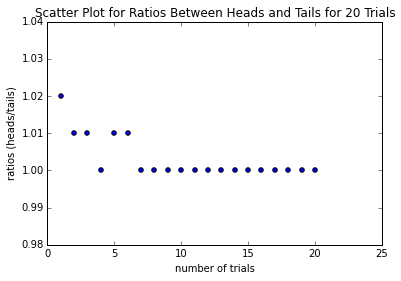

In [46]:
mplot.scatter(range(1,21), mnratios)
#mplot.yscale('log')
mplot.xlabel("number of trials")
mplot.ylabel("ratios (heads/tails)")
mplot.title("Scatter Plot for Ratios Between Heads and Tails for 20 Trials")
mplot.show()

In [ ]:
#Plot for the ratio of the SDs

In [43]:
sdratio = [ratio(mn[0], mn[1]) for mn in sds]

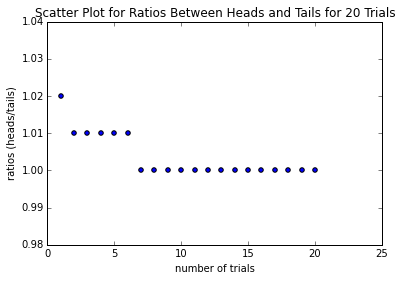

In [47]:
mplot.scatter(range(1,21), sdratio)
#mplot.yscale('log')
mplot.xlabel("number of trials")
mplot.ylabel("ratios (heads/tails)")
mplot.title("Scatter Plot for Ratios Between Heads and Tails for 20 Trials")
mplot.show()

In [82]:
def simulate_bundled2(flip, n = 100, trials = 100000):
    '''Simulates flipping a coin n number of times'''
    flip_results = []
    for trial in range(trials):
        heads = 0
        for step in range(1, n+1):
            if flip() == 0:
                heads += 1
            #if step % 100 == 0:
                flip_results.append(round(heads/step, 2))
    return flip_results

In [83]:
total_trials100 = simulate_bundled2(lambda:coin_flip())

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.91, 0.65, 0.67, 0.65, 0.64, 0.65, 0.67, 0.65, 0.58, 0.59, 0.61]


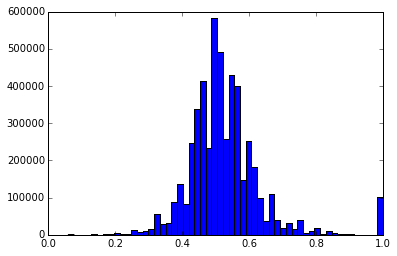

In [87]:
mplot.hist(total_trials100, bins=55)
#mplot.yscale('log', basey=2)
#mplot.yscale('log')
mplot.show()

In [89]:
total_trials1000 = simulate_bundled2(lambda:coin_flip(), n = 1000, trials = 100000)

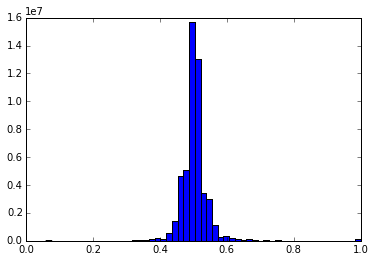

In [90]:
mplot.hist(total_trials1000, bins=55)
#mplot.yscale('log', basey=2)
#mplot.yscale('log')
mplot.show()